<a href="https://colab.research.google.com/github/souzamichel/binarizacao/blob/main/binarizacao_dio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original


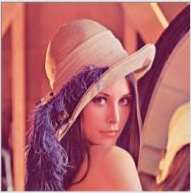

Tons de Cinza


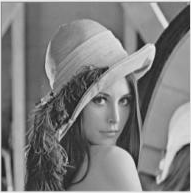

Binarizadas


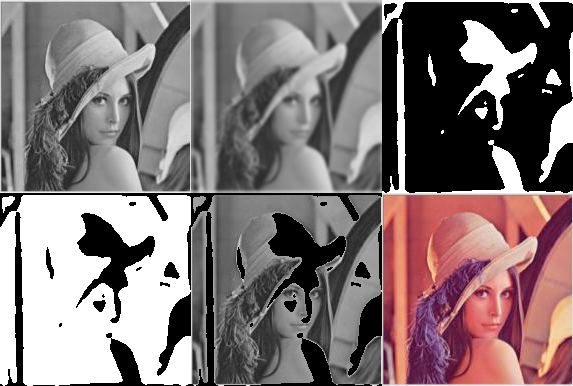

In [18]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 1. Carrega a imagem (ajuste caminho/nome se necessário)
img_orig = cv2.imread('modelo.PNG')
if img_orig is None:
    raise FileNotFoundError(
        "Não foi possível carregar 'ponte.PNG'. Verifique nome e diretório."
    )

# 2. Exibe a imagem original em cores
print('Original')
cv2_imshow(img_orig)
cv2.waitKey(0)

# 3. Converte para escala de cinza (0–255) e exibe
print('Tons de Cinza')
gray = cv2.cvtColor(img_orig, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
cv2.waitKey(0)

# 4. Desfoque Gaussiano sobre o cinza
blur = cv2.GaussianBlur(gray, (7, 7), 0)

# 5. Limiarizações direta e inversa
_, binary     = cv2.threshold(blur, 160, 255, cv2.THRESH_BINARY)
_, binary_inv = cv2.threshold(blur, 160, 255, cv2.THRESH_BINARY_INV)

# 6. Máscara inversa aplicada ao cinza
masked_inv = cv2.bitwise_and(gray, gray, mask=binary_inv)

# 7. Prepara imagens para montagem (converte tudo para BGR)
def to_bgr(img):
    return cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

gray_c     = to_bgr(gray)
blur_c     = to_bgr(blur)
binary_c   = to_bgr(binary)
binary_i_c = to_bgr(binary_inv)
mask_c     = to_bgr(masked_inv)

# 8. Montagem 2x3:
#    [Cinza | Blur    | Binary     ]
#    [InvBin| Mask    | Original   ]
row1    = np.hstack([gray_c, blur_c, binary_c])
row2    = np.hstack([binary_i_c, mask_c, img_orig])
montage = np.vstack([row1, row2])

# 9. Exibe a montagem final
print('Binarizadas')
cv2_imshow(montage)
cv2.waitKey(0)
cv2.destroyAllWindows()
